In [3]:
# %%
import pandas as pd
import tqdm
# %%
root_folder = '/home/azureuser/cloudfiles/code/Users/Shared/hansard'

# %%
df_probs_fn = root_folder + '/speeches_df_topics_probs.pkl'

# %%
print(f'load df from {df_probs_fn}')
speeches_df = pd.read_pickle(df_probs_fn)

load df from /home/azureuser/cloudfiles/code/Users/Shared/hansard/speeches_df_topics_probs.pkl


In [4]:
speeches_df.head()

,date_time,chamber,parliament,session,period,page,name,name_id,party,in_gov,electorate,first_speech,context,context_title,context_type,speech_type,probs
0,1998-03-02 12:31:00,Reps,38,1,6,1,"Grace, Elizabeth, MP",ML6,LP,True,Lilley,0,debate,committees,committees,speech,"[4.015e-05, 0.01204087, 3.888e-05, 4.182e-05, ..."
1,1998-03-02 12:32:00,Senate,38,1,6,1,"Neal, Sen Belinda",B36,ALP,True,NSW,0,debate,social security legislation amendment (youth a...,bills,speech,"[1.474e-05, 1.999e-05, 1.428e-05, 1.536e-05, 1..."
2,1998-03-02 12:36:00,Reps,38,1,6,1,"Price, Roger, MP",QI4,ALP,True,Chifley,0,debate,committees,committees,speech,"[3.574e-05, 4.846e-05, 3.461e-05, 3.723e-05, 3..."
3,1998-03-02 12:44:00,Reps,38,1,6,1,"Smith, Tony, MP",SK6,LP,True,Dickson,0,debate,committees,committees,speech,"[2.402e-05, 3.257e-05, 2.326e-05, 2.502e-05, 2..."
4,1998-03-02 12:52:00,Senate,38,1,6,1,"Carr, Sen Kim",AW5,ALP,True,VIC,0,debate,social security legislation amendment (youth a...,bills,speech,"[1.08e-05, 1.465e-05, 1.046e-05, 0.03526434, 1..."


In [5]:
speeches_df.tail(5)

,date_time,chamber,parliament,session,period,page,name,name_id,party,in_gov,electorate,first_speech,context,context_title,context_type,speech_type,probs
443844,2020-09-03 17:44:00,Reps,46,1,4,0,"Smith, Tony, MP",00APG,LP,False,Casey,NaN,debate,adjournment,adjournment,speech,"[0.00837469, 0.01135466, 0.00811063, 0.0087238..."
443845,2020-09-03 17:45:00,Senate,46,1,4,0,"Chandler, Sen Claire",264449,LP,False,Tasmania,NaN,debate,adjournment,adjournment,speech,"[3.96e-05, 5.369e-05, 3.835e-05, 4.125e-05, 4...."
443846,2020-09-03 17:46:00,Reps,46,1,4,0,"Smith, Tony, MP",00APG,LP,False,Casey,NaN,debate,adjournment,adjournment,speech,"[0.00189601, 0.00257067, 0.00183623, 0.0019750..."
443847,2020-09-03 17:50:00,Senate,46,1,4,0,"McCarthy, Sen Malarndirri",122087,ALP,False,Northern Territory,NaN,debate,adjournment,adjournment,speech,"[0.0001419, 0.00019239, 0.00013742, 0.00014781..."
443848,2020-09-03 17:53:00,Senate,46,1,4,0,"Waters, Sen Larissa",192970,AG,False,Queensland,NaN,debate,adjournment,adjournment,speech,"[5.917e-05, 8.023e-05, 5.731e-05, 6.164e-05, 6..."


In [6]:
print('check that topics probs add up to 1 for each doc')
speeches_df.apply(lambda x: sum(x['probs']), axis='columns')

check that topics probs add up to 1 for each doc


0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
443844    1.0
443845    1.0
443846    1.0
443847    1.0
443848    1.0
Length: 443849, dtype: float64

# Topics over time

In [7]:


sample = speeches_df

# expand ['probs'] into its own dataframe
probs = sample['probs'].apply(pd.Series)

# rename each variable in probs
probs = probs.rename(columns = lambda x : 'pr_' + str(x))

probs['date_time'] = sample['date_time']

# view the probs dataframe
probs



,pr_0,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,pr_9,...,pr_91,pr_92,pr_93,pr_94,pr_95,pr_96,pr_97,pr_98,pr_99,date_time
0,0.000040,0.012041,0.000039,0.000042,0.000042,0.222084,0.000036,0.000045,0.000046,0.000045,...,0.000042,0.000044,0.040370,0.000037,0.000049,0.000043,0.000059,0.000044,0.000045,1998-03-02 12:31:00
1,0.000015,0.000020,0.000014,0.000015,0.000015,0.000014,0.000013,0.000016,0.000017,0.000017,...,0.000015,0.000016,0.000030,0.003787,0.000018,0.000016,0.000022,0.000016,0.000016,1998-03-02 12:32:00
2,0.000036,0.000048,0.000035,0.000037,0.000037,0.343432,0.006661,0.000040,0.000041,0.000040,...,0.000038,0.000039,0.000072,0.000033,0.000043,0.000039,0.000052,0.000039,0.000040,1998-03-02 12:36:00
3,0.000024,0.000033,0.000023,0.000025,0.000025,0.440270,0.000022,0.000027,0.000027,0.000027,...,0.000025,0.000026,0.000048,0.000022,0.000029,0.000026,0.029690,0.000026,0.000027,1998-03-02 12:44:00
4,0.000011,0.000015,0.000010,0.035264,0.000011,0.000011,0.000010,0.000012,0.000012,0.000012,...,0.000011,0.000012,0.000022,0.000010,0.064754,0.000012,0.000016,0.000012,0.000012,1998-03-02 12:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443844,0.008375,0.011355,0.008111,0.008724,0.008716,0.008219,0.007507,0.009311,0.009493,0.009383,...,0.008801,0.009191,0.016908,0.007795,0.010186,0.009043,0.012225,0.009229,0.009303,2020-09-03 17:44:00
443845,0.000040,0.000054,0.000038,0.000041,0.000041,0.004937,0.000036,0.000044,0.000045,0.000044,...,0.000042,0.000043,0.000080,0.000037,0.000048,0.000043,0.000058,0.000044,0.000044,2020-09-03 17:45:00
443846,0.001896,0.002571,0.001836,0.001975,0.001973,0.001861,0.001700,0.002108,0.002149,0.002124,...,0.001993,0.002081,0.003828,0.001765,0.002306,0.002047,0.537782,0.002089,0.002106,2020-09-03 17:46:00
443847,0.000142,0.000192,0.000137,0.000148,0.000148,0.000139,0.000127,0.000158,0.000161,0.000159,...,0.000149,0.000156,0.000286,0.000132,0.000173,0.000153,0.000207,0.000156,0.000158,2020-09-03 17:50:00


In [21]:
# take all speeches or a subset.
# define a period eg daily, weel;y, yearly, etc .... flexibility to make parliament?
# for all speeches in each period, add up each topic and divide by number of speeches
# identify the n topics in each period
# line plot over time

import numpy as np

#dates = np.arange(datetime.datetime(1998,3,1), datetime.datetime(2020,9,4), step =  )

dates = pd.date_range('1998-01-01', end = '2020-12-01', freq='YS') # MS is Month Start; QS = Quarter Start; YS = Year Start
ends = np.array(dates)

dates = np.delete(ends,-1)
ends = np.delete(ends, 0)

periods = pd.DataFrame({'start': dates, 'end': ends})
periods.head()

,start,end
0,1998-01-01,1999-01-01
1,1999-01-01,2000-01-01
2,2000-01-01,2001-01-01
3,2001-01-01,2002-01-01
4,2002-01-01,2003-01-01


In [22]:

means = []

for index, row in periods.iterrows():
    mask = (probs['date_time'] >= row['start']) & (probs['date_time'] < row['end'])
    these_means = probs[mask].mean()
    means.append(these_means)
    
#print(means)
tbp = pd.DataFrame(means)
print(tbp)

# rename each variable in probs
#probs = probs.rename(columns = lambda x : 'pr_' + str(x))
    

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """


        pr_0      pr_1      pr_2      pr_3      pr_4      pr_5      pr_6  \
0   0.002266  0.007907  0.002946  0.005823  0.005222  0.008030  0.002704   
1   0.002043  0.009084  0.003103  0.004975  0.007843  0.007986  0.002736   
2   0.001924  0.008307  0.002372  0.004567  0.005226  0.007410  0.003927   
3   0.002960  0.012242  0.002714  0.005868  0.003936  0.007765  0.001759   
4   0.002656  0.008045  0.003219  0.007347  0.006058  0.007850  0.001527   
5   0.002398  0.005726  0.004127  0.004161  0.005770  0.008313  0.001650   
6   0.002724  0.006907  0.003383  0.003798  0.006751  0.009034  0.002483   
7   0.002935  0.005686  0.003676  0.004859  0.009749  0.006891  0.002210   
8   0.005278  0.005357  0.002937  0.004070  0.005773  0.006845  0.002239   
9   0.010983  0.006430  0.003035  0.004684  0.005336  0.006251  0.003311   
10  0.012245  0.005483  0.001709  0.002763  0.011352  0.004081  0.003805   
11  0.022396  0.007874  0.002472  0.002548  0.009941  0.004702  0.002136   
12  0.010874

In [23]:
# find only the top n in each period
top_n = tbp.apply(pd.Series.nlargest, axis=1, n=5)

#period label
top_n.insert(0, 'period', periods['start'])
top_n.set_index('period', inplace=True)

print(top_n)

               pr_11     pr_19     pr_37     pr_39     pr_46     pr_68  \
period                                                                   
1998-01-01       NaN       NaN  0.046272  0.055705       NaN  0.074629   
1999-01-01       NaN       NaN  0.043825  0.048224       NaN  0.070160   
2000-01-01       NaN       NaN  0.048598  0.041246       NaN  0.067578   
2001-01-01       NaN       NaN  0.045372  0.042960       NaN  0.055131   
2002-01-01       NaN       NaN  0.050454  0.037523       NaN  0.071676   
2003-01-01       NaN       NaN  0.045751  0.035610       NaN  0.056288   
2004-01-01       NaN       NaN  0.046009  0.036702       NaN  0.057926   
2005-01-01       NaN       NaN  0.042769  0.033568       NaN  0.041148   
2006-01-01       NaN       NaN  0.043089  0.033972       NaN  0.048397   
2007-01-01       NaN       NaN  0.037335  0.036963  0.023786  0.052439   
2008-01-01  0.046902       NaN  0.031493  0.040106       NaN  0.042687   
2009-01-01  0.050971       NaN  0.0289

In [24]:
# find the top n in the whole period




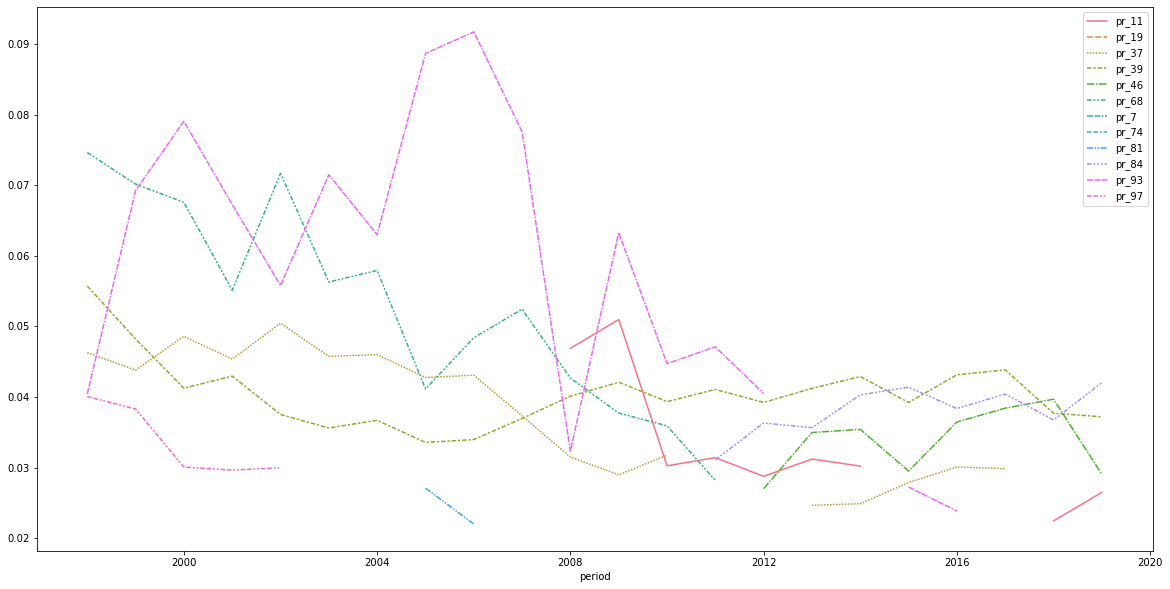

In [25]:
# importing packages 
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,10))
sns.lineplot(data=top_n) 




#plt.plot(top_n)
#plt.legend()
#plt.show()

#top_n.plot(legend = None)

In [7]:
# %%
# READ IN MODEL AND EXAMINE TOPICS

    
from gensim.models import ldamodel

root_folder = '/home/azureuser/cloudfiles/code/Users/Shared/hansard'

lda_model_fn = root_folder + '/lda.model'
print(f'load lda model from {lda_model_fn}')
lda_model = ldamodel.LdaModel.load(lda_model_fn)

load lda model from /home/azureuser/cloudfiles/code/Users/Shared/hansard/lda.model


In [18]:
#  print topics and top terms in topic
def getTopic(lda_model, topicid, n):
    topic_terms = lda_model.get_topic_terms(topicid, topn=n)
    terms = list()
    probs = list()
    for termid, prob in topic_terms:
        term = lda_model.id2word.get(termid)
        terms.append(term)
        probs.append(prob)
    #terms = ' '.join(terms)
    return((terms, probs))

def pickle_to_subdir(thing, dir_name, pickle_name):
    import os
    os.makedirs(dir_name, exist_ok=True)
    
    import pickle
    filepath = str(dir_name) +'/'+ str(pickle_name)
    f = open(filepath,"wb")
    pickle.dump(thing,f)
    f.close()

In [32]:

topic_dict = {i: getTopic(lda_model,i, n=12) for i in range(lda_model.num_topics)}

for t in topic_dict:
    print(str(t).zfill(2), " ".join(topic_dict[t][0]))
#    print(topic_dict[t][1])


00 climate_change change climate emission_trading scheme need emission issue action would science reduction_scheme
01 business small_business small_medium support time small also economy cent many owner cost
02 commission industry commissioner building_construction cfmeu building union royal_commission building_industry work reynolds construction_industry
03 union victoria victorian trade_union labor_party member movement union_movement worker organisation registered_organisation would
04 employee fair_work organisation employer workplace charity agreement workplace_relation work sector system also
05 court case tribunal federal_court family_court matter family attorney_general judge justice lawyer high_court
06 apology parliamentary_budget work_choice atsic reconciliation sorry stolen_generation report would robb office howard_john
07 iraq united_state united_nation international world country state xenophon resolution support security_council iran
08 science research csiro national m

In [ ]:
# suggets extra stopwords: ['would', 'think', 'million', 'billion', 'matter', 'issue', 'also', 'many', 'nation', 'national', 'place', 'year', 'time', 'said', 'party']

In [35]:
pickle_to_subdir(topic_dict, '.', 'topics.pkl')